In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from DAFD.metrics_study.metric_utils import *
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from tqdm import tqdm
from DAFD.helper_scripts.ModelHelper import ModelHelper
from sklearn.feature_selection import f_regression, f_classif

Using TensorFlow backend.
c:\users\dpmci\miniconda3\envs\dafd\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\dpmci\miniconda3\envs\dafd\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\dpmci\miniconda3\envs\dafd\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\dpmci\miniconda3\envs\dafd\lib\site-pa

regime classifier
Loading classifier
Train accuracy: 0.9887387387387387

Regression model generation_rate2
Loading Regressor
R square (R^2) for Train:                 0.987384

Regression model droplet_size2
Loading Regressor
R square (R^2) for Train:                 0.983142

Regression model generation_rate1
Loading Regressor
R square (R^2) for Train:                 0.965872

Regression model droplet_size1
Loading Regressor
R square (R^2) for Train:                 0.953238

regime classifier
Loading classifier
Train accuracy: 0.9887387387387387

Regression model generation_rate2
Loading Regressor
R square (R^2) for Train:                 0.987384

Regression model droplet_size2
Loading Regressor
R square (R^2) for Train:                 0.983142

Regression model generation_rate1
Loading Regressor
R square (R^2) for Train:                 0.965872

Regression model droplet_size1
Loading Regressor
R square (R^2) for Train:                 0.953238



In [5]:
# Load datasets to be used for analysis
chips = pd.read_csv("data/20220520_versatility_study/20220520_versatility_results_dripping.csv")
all_results = pd.read_csv("data/20220520_allData.csv")

# Filter results manually
#all_results = all_results.loc[all_results["regime"] == 1, :]
all_results.rename(columns={"chip_number":"chip_num"}, inplace=True)
#all_results = all_results.loc[all_results["diff"] < 50, :]
chips = chips.loc[chips["score"] != -1,:]
chips = chips.sort_values("score")

In [7]:
len(all_results.loc[all_results.regime==2,:])/len(all_results)

0.5478456888888888

In [4]:
import matplotlib
bin_range = [0,30000]
plt.figure(figsize=[10,2.5])
plt.hist(ch_in_range.score, bins=30, range=bin_range, color="#d3d3d3")
plt.xlim([0,30000])
plt.xlabel("Versatility Score")
plt.ylabel("Counts")

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#plt.savefig("20220609_versatility_distribution.pdf")


NameError: name 'ch_in_range' is not defined

<Figure size 720x180 with 0 Axes>

In [5]:
unique_chips = all_results.loc[:, "chip_num"].unique()
arr_means = []
for chip in unique_chips:
    data = all_results.loc[all_results["chip_num"] == chip, :]
    arr_means.append([chip, data.droplet_size.median(), data.generation_rate.median()])
df_means = pd.DataFrame(arr_means, columns=["chip_num", "mean_size", "mean_rate"])

KeyboardInterrupt: 

In [ ]:
df_means.loc[df_means.chip_num==17627,:]

In [ ]:
max_val = 110
min_val = 90

in_range = df_means.loc[df_means.mean_size <max_val, :].loc[df_means.mean_size>min_val,:]
in_range = in_range.loc[in_range.mean_rate <max_val, :].loc[in_range.mean_rate>min_val,:]
ch_in_range = chips.loc[in_range.chip_num, :].sort_values("score").dropna()
ch_in_range

In [12]:
ch_in_range.to_csv("20220315_versatile_chips.csv")

In [ ]:
all_results.loc[all_results.chip_num == 13743, :]

In [ ]:
test = all_results.loc[all_results.chip_num == 13743, :]
test = test.loc[test.regime == 1, :]
test.mean()

In [ ]:
nos = in_range.chip_num
dripping = all_results.loc[all_results.regime == 1, :]

# #restus = all_results.loc[all_results.chip_num == 13743, :]
# results = test.loc[test.regime == 1, :]

results = [all_results.loc[all_results["chip_num"]==x].loc[all_results.regime==1] for x in nos]

In [ ]:
for i, x in enumerate(results):
    sizes = x["droplet_size"].tolist()
    rates = x["generation_rate"].tolist()
    chnum = x.chip_num.unique()[0]
    score = -1
    #np.array(nos)[0]
    #
    print(f"No:{chnum}, score: {score}") 
    print(f"Size Range: {max(sizes) - min(sizes)}, Rate Range: {max(rates) - min(rates)}")
    print(f"Mean Size: {np.mean(sizes)} Mean Rate: {np.mean(rates)}")
    print(f"pct size change: {(max(sizes)/min(sizes))}, pct rate change: {(max(rates)/min(rates))}")
    print("\n")

(0, 700)

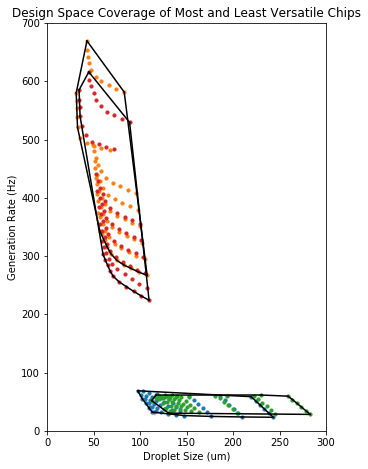

In [11]:
# Get Most and Least versatile devices and compare plots
diff= 25
highest_results = all_results.loc[all_results["chip_num"]==754, :]#.loc[all_results["diff"]<diff,:]
lowest_results = all_results.loc[all_results["chip_num"]==15870, :]#.loc[all_results["diff"]<diff,:]

highest_used = all_results.loc[all_results["chip_num"]==629, :]#.loc[all_results["diff"]<diff,:]
low_used = all_results.loc[all_results["chip_num"]==21495, :]#.loc[all_results["diff"]<diff,:]

plt.figure(figsize=(5,7.5))

#res_2 = results[3:] 

for x in [lowest_results, highest_results, low_used, highest_used]:
    sizes = x["droplet_size"].tolist()
    rates = x["generation_rate"].tolist()
    points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
    hull = ConvexHull(points)
    plt.scatter(points[:,0], points[:,1], s=10)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        
plt.title("Design Space Coverage of Most and Least Versatile Chips")
plt.xlabel("Droplet Size (um)")
plt.ylabel("Generation Rate (Hz)")
#plt.legend(["not versatile", "versatile"])
plt.xlim([0,300])
plt.ylim([0,700])
#plt.savefig("VersatilityExtremes_Compare.pdf")
# ch_in_range.to_csv("99_101_versatility_overlaps.csv")

In [31]:
hr_bound

,Unnamed: 0,index,aspect_ratio,capillary_number,chip_num,droplet_size,expansion_ratio,flow_rate_ratio,generation_rate,inferred_size,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size,regime
2644050,2644050,1410160,1.0,0.050000,17627,178.615250,5.0,2.000000,42.092743,NaN,2.0,2.0,2.0,150,1
2644051,2644051,1410168,1.0,0.050000,17627,149.669662,5.0,4.222222,41.682335,NaN,2.0,2.0,2.0,150,1
2644052,2644052,1410176,1.0,0.050000,17627,115.000557,5.0,6.444444,39.747055,NaN,2.0,2.0,2.0,150,1
2644053,2644053,1410184,1.0,0.050000,17627,95.906609,5.0,8.666667,37.811783,NaN,2.0,2.0,2.0,150,1
2644054,2644054,1410192,1.0,0.050000,17627,80.401558,5.0,10.888889,32.146824,NaN,2.0,2.0,2.0,150,1
2644055,2644055,1410200,1.0,0.050000,17627,72.758385,5.0,13.111111,25.889336,NaN,2.0,2.0,2.0,150,1
2644056,2644056,1410208,1.0,0.050000,17627,61.237568,5.0,15.333333,20.852476,NaN,2.0,2.0,2.0,150,1
2644057,2644057,1410216,1.0,0.050000,17627,49.548969,5.0,17.555556,19.579254,NaN,2.0,2.0,2.0,150,1
2644058,2644058,1410224,1.0,0.050000,17627,46.842411,5.0,19.777778,19.749371,NaN,2.0,2.0,2.0,150,1
2644059,2644059,1410232,1.0,0.050000,17627,47.793163,5.0,22.000000,20.206959,NaN,2.0,2.0,2.0,150,1


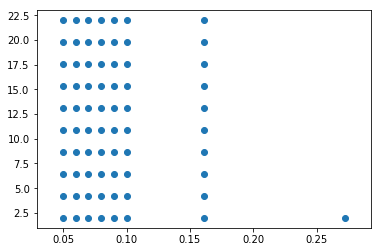

In [30]:
plt.scatter(
    lowest_results.loc[:, "capillary_number"],
    lowest_results.loc[:, "flow_rate_ratio"],
)
hr1 = highest_results.loc[highest_results.capillary_number < 0.2,:]
hr2 = highest_results.loc[highest_results.capillary_number ==0.27222222,:].loc[highest_results.flow_rate_ratio==2,:]
hr_bound = pd.concat([hr1, hr2])

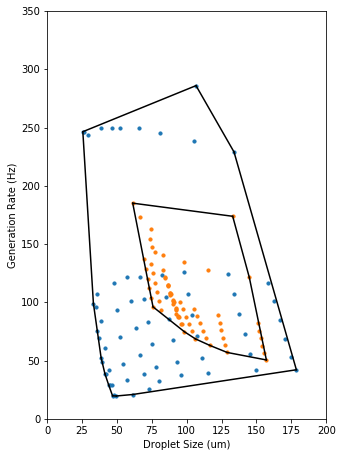

In [37]:
# Get Most and Least versatile devices and compare plots
diff= 25
highest_results = all_results.loc[all_results["chip_num"]==17627, :]#.loc[all_results["diff"]<diff,:]
lowest_results = all_results.loc[all_results["chip_num"]==22531, :]#.loc[all_results["diff"]<diff,:]

# highest_used = all_results.loc[all_results["chip_num"]==629, :]#.loc[all_results["diff"]<diff,:]
# low_used = all_results.loc[all_results["chip_num"]==21495, :]#.loc[all_results["diff"]<diff,:]

plt.figure(figsize=(5,7.5))

#res_2 = results[3:] 

for x in [highest_results, lowest_results]:#, low_used, highest_used]:
    sizes = x["droplet_size"].tolist()
    rates = x["generation_rate"].tolist()
    points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
    hull = ConvexHull(points)
    plt.scatter(points[:,0], points[:,1], s=10)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        
#plt.title("Design Space Coverage of Most versatile chip,\n with and without flow bounding to less versatile")
plt.xlabel("Droplet Size (um)")
plt.ylabel("Generation Rate (Hz)")
#plt.legend(["not versatile", "versatile"])
plt.xlim([0,200])
plt.ylim([0,350])
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("VersatilityExtremes_Compare.pdf")
# ch_in_range.to_csv("99_101_versatility_overlaps.csv")

In [14]:
all_results.loc[all_results["chip_num"]==17627, :].regime.unique()

array([2], dtype=int64)

In [13]:
highest_dict = highest_results.to_dict(orient="record")
lowest_dict = lowest_results.to_dict(orient="record")


In [14]:
lowest_denormed = []
highest_denormed = []
for pt in highest_dict:
    highest_denormed.append(denormalize_features(pt))

for pt in lowest_dict:
    lowest_denormed.append(denormalize_features(pt))

In [15]:
highDenorm_df = pd.DataFrame(highest_denormed)
lowDenorm_df = pd.DataFrame(lowest_denormed)


In [45]:
print(np.max(highDenorm_df.water_flow) - np.min(highDenorm_df.water_flow))
print(np.max(lowDenorm_df.water_flow) - np.min(lowDenorm_df.water_flow))


21.05848679275271
26.871506584502146


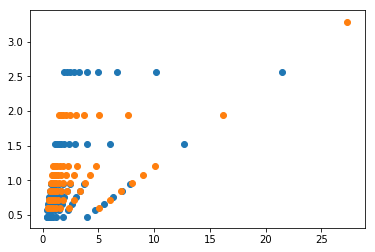

In [42]:
plt.scatter(highDenorm_df.water_flow, highDenorm_df.oil_flow)
plt.scatter(lowDenorm_df.water_flow, lowDenorm_df.oil_flow)

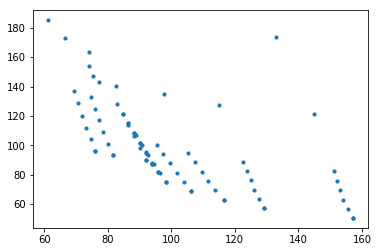

In [18]:
#highest_results.to_csv("20220315_    sizes = x["droplet_size"].tolist()
sizes = lowest_results["droplet_size"].tolist()
rates = lowest_results["generation_rate"].tolist()
points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
hull = ConvexHull(points)
plt.scatter(points[:,0], points[:,1], s=10)

In [19]:
simps = []
for simplex in hull.simplices:
    simps.append(simplex[0])
    simps.append(simplex[1])
#        print(f"size:{points[simplex, 0]}, rate:{points[simplex, 1]}", 'k-')
print(len(simps))
print(len(np.unique(simps)))

24
12


In [20]:
lowest_results.iloc[np.unique(simps),:].to_csv("20220316_notVers_hull.csv")

In [41]:
sz = []
for simplex in hull.simplices:
    sz.append(points[simplex[0]][0])
    sz.append(points[simplex[1]][0])

In [42]:
np.unique(sz)

array([ 61.30913925,  71.94506836,  73.25038147,  96.32844543,
       106.27506256, 116.50121307, 129.03692627, 144.88552856,
       157.11384583])

*Main Effect Analysis*

In [3]:
mean_score = chips["score"].mean()
mean_size_score = chips["size_score"].mean()
mean_rate_score = chips["rate_score"].mean()

In [4]:
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size']#, "capillary_number", "flow_rate_ratio"]

meff_vals = {}
for col in meff_cols:
    sweep_range = all_results[col].unique()
    size_score_avgs = []
    rate_score_avgs = []
    score_avgs = []
    size_score_std = []
    rate_score_std = []
    score_std = []
    
    
    
    for val in sweep_range:
        #size_avgs.append(size_normalized[all_results[col] == val].mean())
        size_score_avgs.append(chips.loc[chips[col] == val, "size_score"].mean())
        rate_score_avgs.append(chips.loc[chips[col] == val, "rate_score"].mean())
        score_avgs.append(chips.loc[chips[col] == val, "score"].mean())
        size_score_std.append(chips.loc[chips[col] == val, "size_score"].std())
        rate_score_std.append(chips.loc[chips[col] == val, "rate_score"].std())
        score_std.append(chips.loc[chips[col] == val, "score"].std())

        
        #meff_vals[col] = {"range": sweep_range, "size_averages": size_avgs, "rate_averages": rate_avgs}
    meff_vals[col] = {"range": sweep_range, "size_score_avgs": size_score_avgs, "rate_score_avgs": rate_score_avgs, "score_avgs": score_avgs,
                      "size_score_std": size_score_std, "rate_score_std":rate_score_std, "score_std":score_std}
    

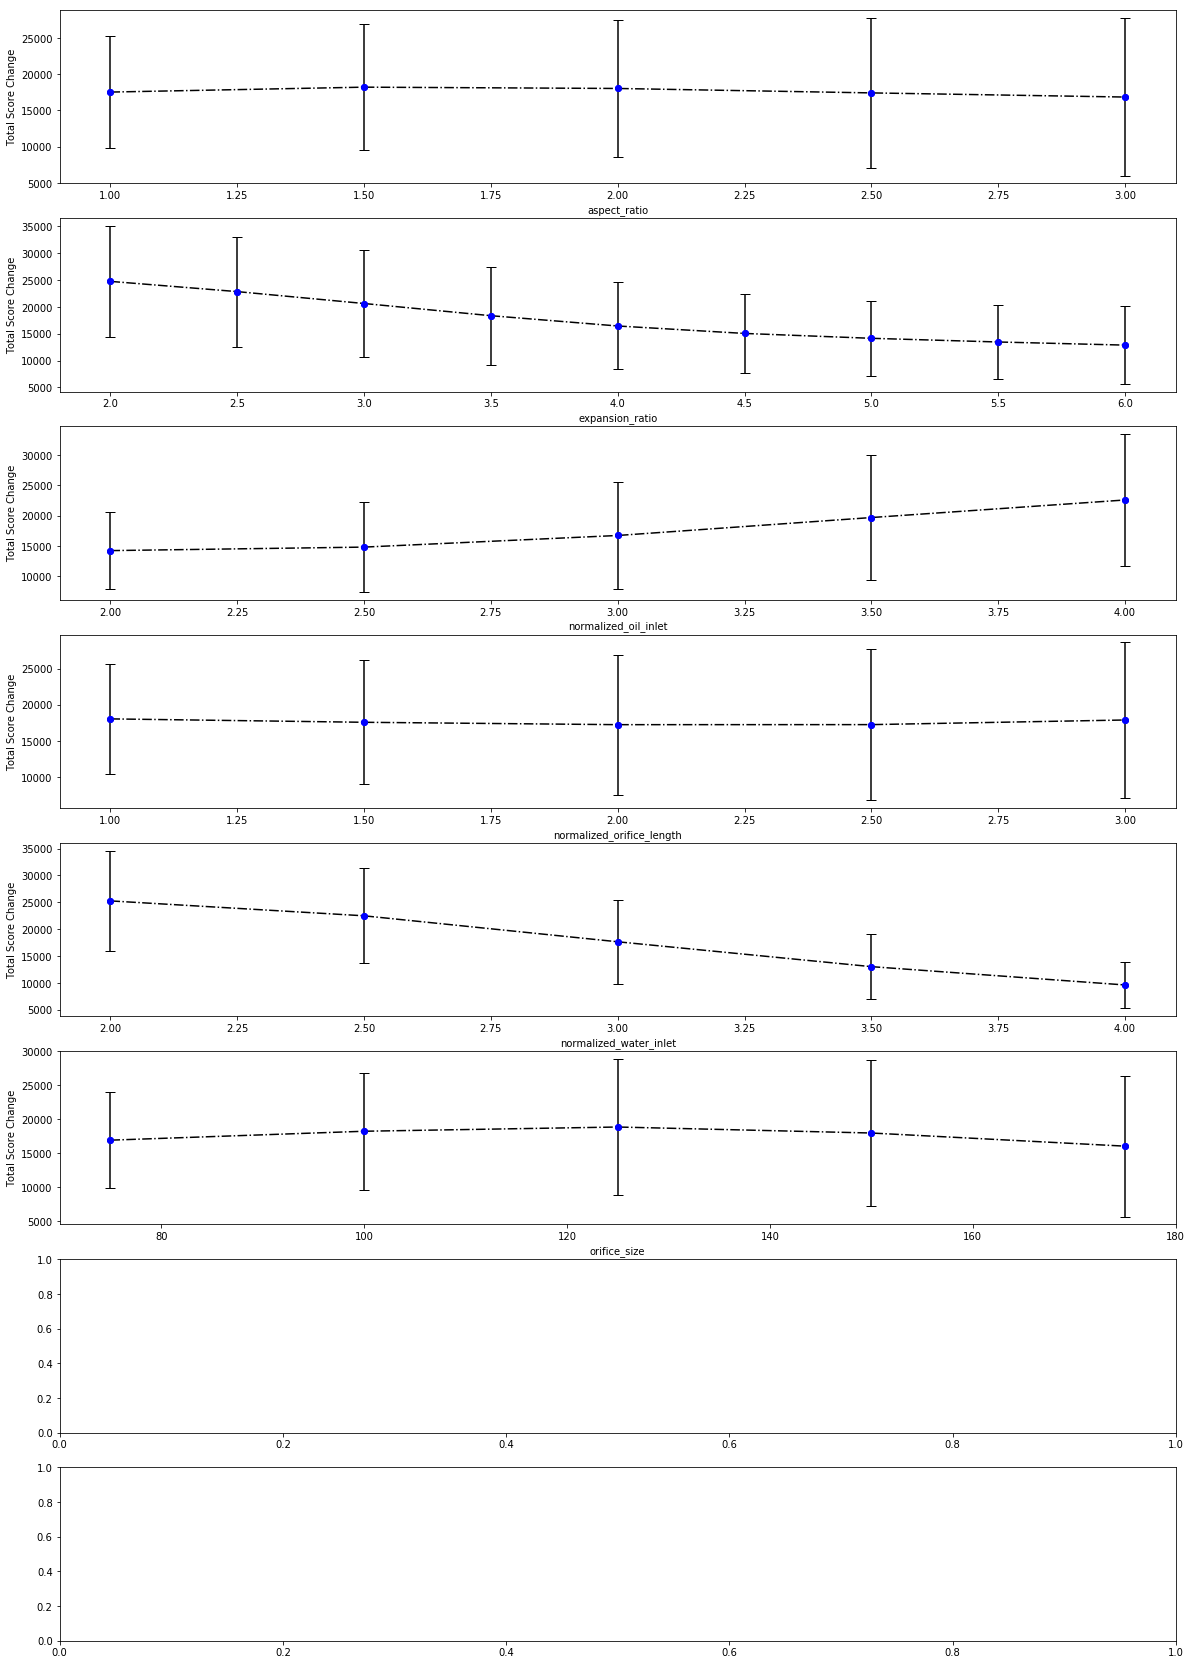

In [7]:
fig, axs = plt.subplots(8,1, figsize=[20,30])

for i, param in enumerate(meff_vals.keys()):
    mean_score = np.mean(meff_vals[param]["score_avgs"])
    
    param_range = meff_vals[param]["range"]
    score_normed =  meff_vals[param]["score_avgs"]#/mean_score
    
    score_std_normed =  meff_vals[param]["score_std"]#/mean_score
    
    
    
    axs[i].plot(param_range, score_normed,"bo")
    axs[i].errorbar(param_range, score_normed, yerr=score_std_normed, fmt="bo", ecolor="k", capsize=5)
    axs[i].plot(param_range, score_normed, "k-.")
    
    axs[i].set_xlabel(param)
    axs[i].set_ylabel("Total Score Change")

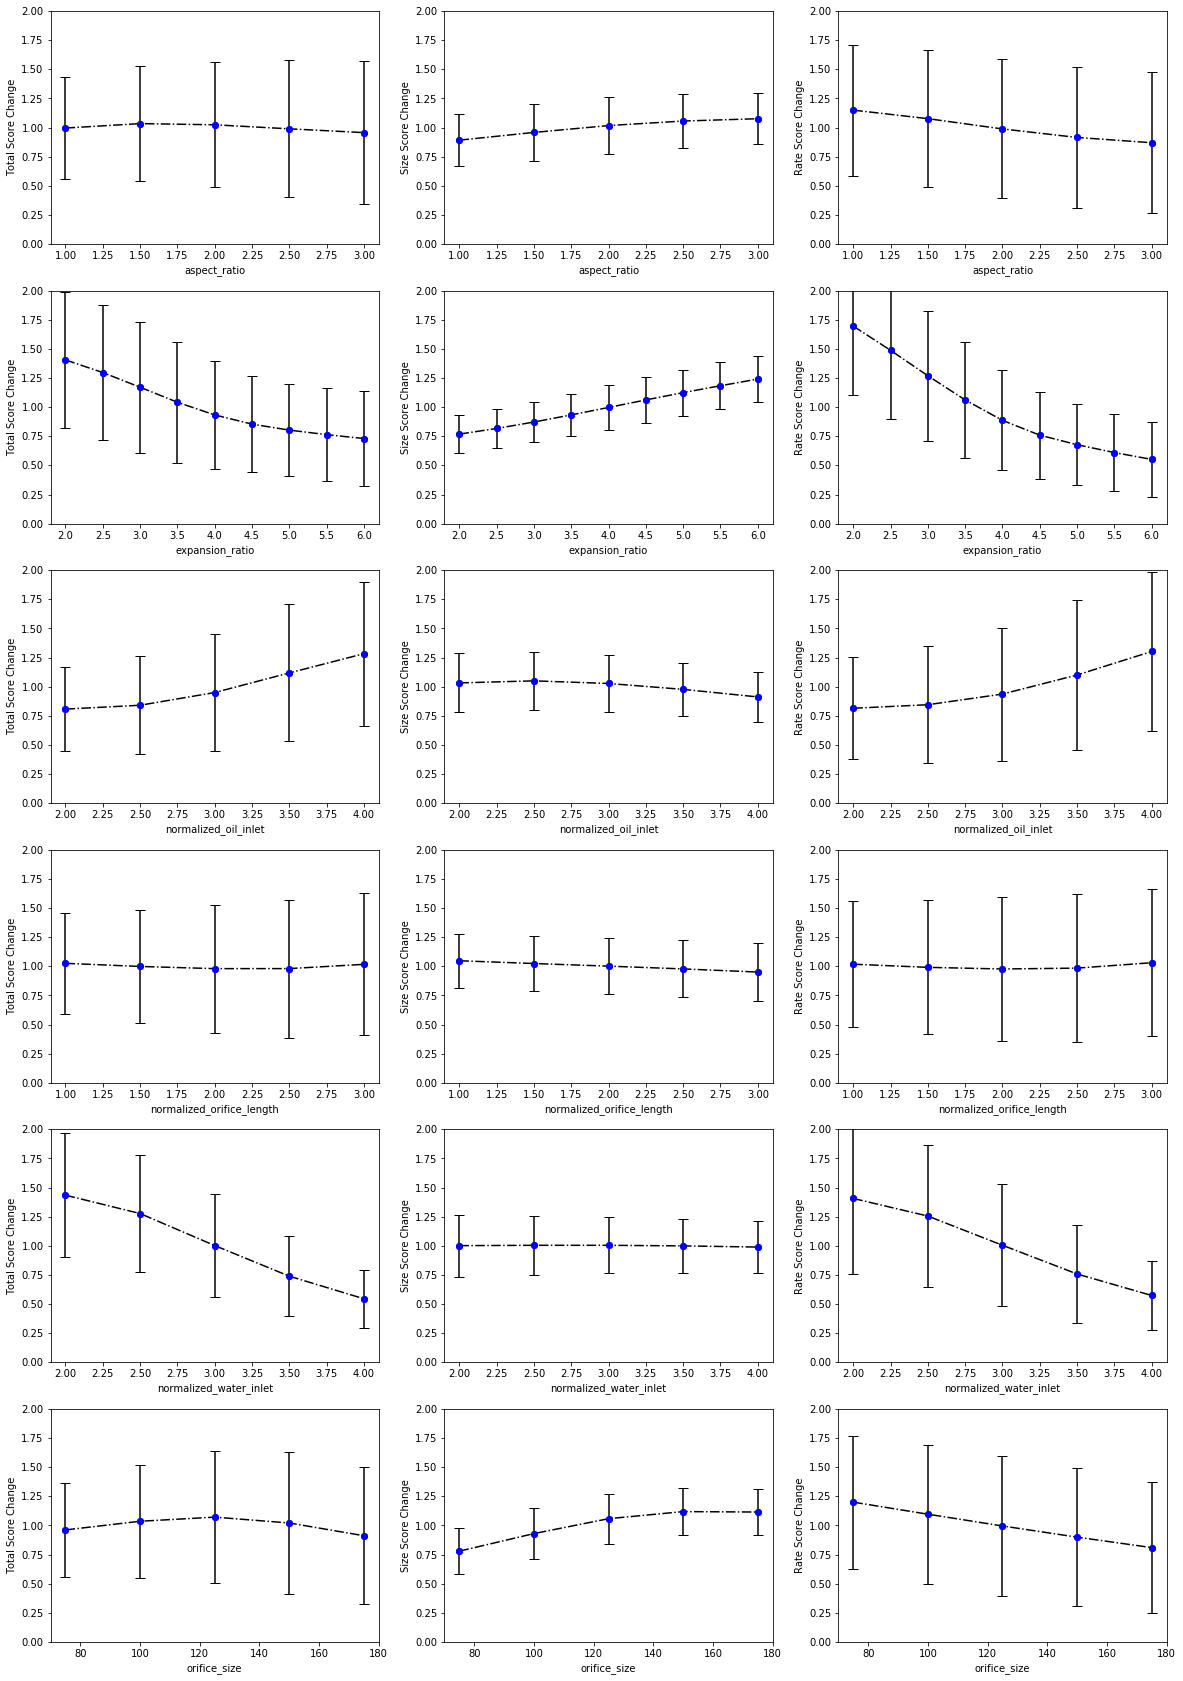

In [8]:
# Plot Main Effect Analysis Results
fig, axs = plt.subplots(6,3, figsize=[20,30])
for i, param in enumerate(meff_vals.keys()):
    param_range = meff_vals[param]["range"]
    score_normed =  meff_vals[param]["score_avgs"]/mean_score
    size_score_normed = meff_vals[param]["size_score_avgs"]/mean_size_score
    rate_score_normed = meff_vals[param]["rate_score_avgs"]/mean_rate_score
    
    score_std_normed =  meff_vals[param]["score_std"]/mean_score
    size_score_std_normed = meff_vals[param]["size_score_std"]/mean_size_score
    rate_score_std_normed = meff_vals[param]["rate_score_std"]/mean_rate_score
    
    axs[i][0].plot(param_range, score_normed, "bo")
    axs[i][0].plot(param_range, score_normed, "k-.")
    axs[i][0].errorbar(param_range, score_normed, yerr=score_std_normed, fmt="bo", ecolor="k", capsize=5)

    axs[i][0].set_xlabel(param)
    axs[i][0].set_ylabel("Total Score Change")
    axs[i][0].set_ylim([0, 2])
        
    axs[i][1].plot(param_range, size_score_normed, "bo")
    axs[i][1].plot(param_range, size_score_normed, "k-.")
    axs[i][1].errorbar(param_range, size_score_normed, yerr=size_score_std_normed, fmt="bo", ecolor="k", capsize=5)

    axs[i][1].set_xlabel(param)
    axs[i][1].set_ylabel("Size Score Change")
    axs[i][1].set_ylim([0, 2])
    
    axs[i][2].plot(param_range, rate_score_normed, "bo")
    axs[i][2].plot(param_range, rate_score_normed, "k-.")
    axs[i][2].errorbar(param_range, rate_score_normed, yerr=rate_score_std_normed, fmt="bo", ecolor="k", capsize=5)

    axs[i][2].set_xlabel(param)
    axs[i][2].set_ylabel("Rate Score Change")
    axs[i][2].set_ylim([0, 2])
    
#plt.savefig('20210420_versatility_dripping.png')

In [55]:
str.capitalize(meff_cols[i]).split("_")[0] + " " + str.capitalize(meff_cols[i]).split("_")[1] 

'Orifice size'

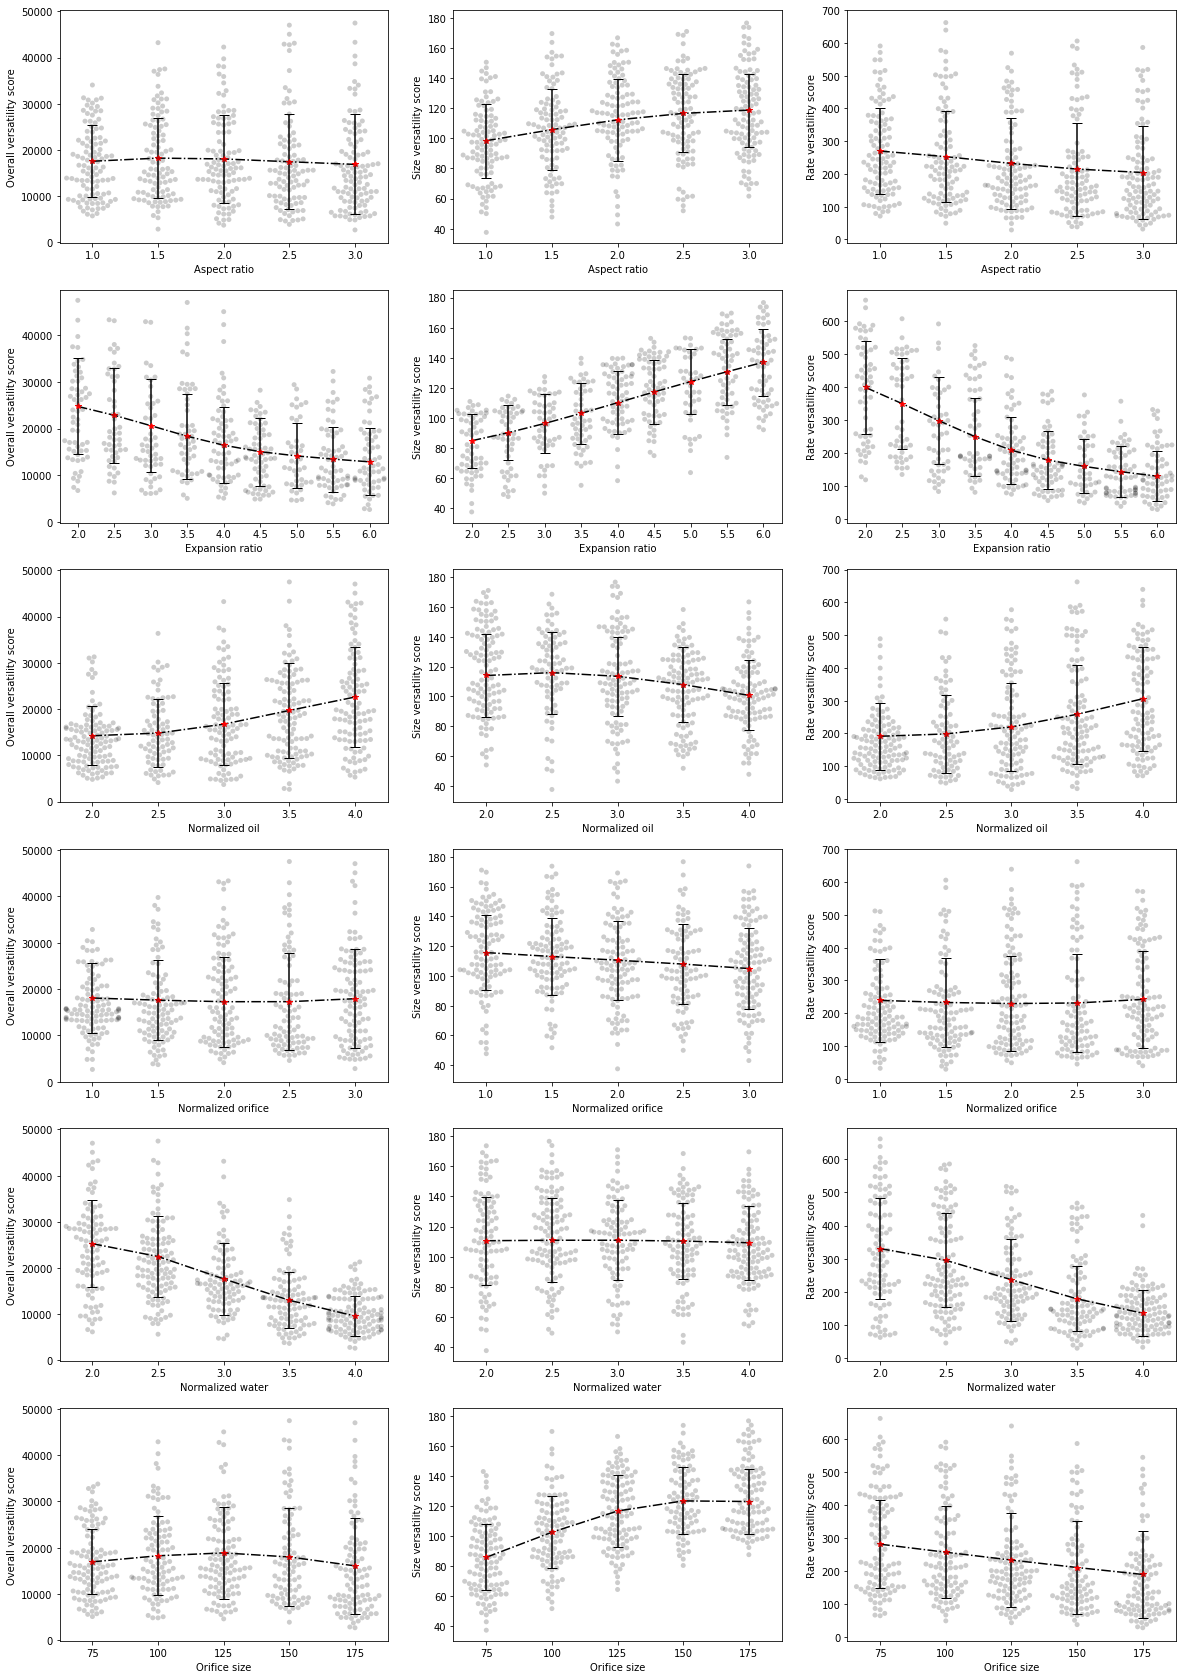

In [5]:
import seaborn as sns
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size']#, "capillary_number", "flow_rate_ratio"]
fig, axs = plt.subplots(6,3, figsize=[20,30])
ylabels = ["Overall versatility score", "Size versatility score", "Rate versatility score"]

data_to_use = chips.sample(500)

for i, col in enumerate(meff_cols):
    for j, score_str in enumerate(["score", "size_score", "rate_score"]):
        param_range = meff_vals[col]["range"]
        score = meff_vals[col][score_str+"_avgs"]
        err = meff_vals[col][score_str+"_std"]

        sns.swarmplot(ax=axs[i][j], x=col, y=score_str, data=data_to_use, color="0", alpha=.2)
        #sns.pointplot(ax=axs[i%3][int(i>=3)],x=col, y='score', data=data_to_use, ci=95)

        #axs[i%3][int(i>=3)].plot(param_range, score, "bo")
        axs[i][j].errorbar(range(len(score)), score, yerr=err, fmt="r*", ecolor="k", capsize=5)
        axs[i][j].plot(range(len(score)), score, "k-.")
        axs[i][j].set_ylabel(ylabels[j])
        axs[i][j].set_xlabel(str.capitalize(meff_cols[i]).split("_")[0] + " " + str.capitalize(meff_cols[i]).split("_")[1])


#plt.savefig("20220802_versatility_maineffect_jetting.png")

    axs[i%3][int(i>=3)].errorbar(range(len(score)), score, yerr=err, fmt="r*", ecolor="k", capsize=5)
Run F-regression to quantify versatility score sensitivity to parameter changes

In [6]:
chips = chips.dropna()
data_to_use = data_to_use.dropna()
X = np.zeros([data_to_use.shape[0], len(meff_cols)])
for i, col in enumerate(meff_cols):
    X[:,i] = data_to_use.dropna().loc[:, col]
Y = data_to_use.loc[:, "score"]

In [9]:
to_use = data_to_use

X = np.zeros([to_use.shape[0], len(meff_cols)])
for i, col in enumerate(meff_cols):
    X[:,i] = to_use.dropna().loc[:, col]
Y = chips.loc[:, "score"]
r_test_all = find_corr(X,to_use.loc[:, "score"])
r_test_size = find_corr(X,to_use.loc[:, "size_score"])
r_test_rate = find_corr(X,to_use.loc[:, "rate_score"])

f_test_all, p_test_all = f_regression(X,to_use.loc[:, "score"])
f_test_size, p_test_size = f_regression(X,to_use.loc[:, "size_score"])
f_test_rate, p_test_rate = f_regression(X,to_use.loc[:, "rate_score"])

F = pd.DataFrame([f_test_all, f_test_size, f_test_rate], columns=meff_cols, index=["score", "size_score", "rate_score"])
P = pd.DataFrame([p_test_all, p_test_size, p_test_rate], columns=meff_cols, index=["score", "size_score", "rate_score"])
R = pd.DataFrame([r_test_all, r_test_size, r_test_rate], columns=meff_cols, index=["score", "size_score", "rate_score"])

In [12]:
F

,aspect_ratio,expansion_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size
score,9967.500611,144.562805,1033.297451,4207.861627,629.689666,448.980721
size_score,11362.738510,5.101905,1176.897311,0.567508,7.669291,14370.561049
rate_score,14602.344481,87.284605,30.698764,3677.702471,131.919543,8707.137684


In [13]:
P

,aspect_ratio,expansion_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size
score,0.0,3.229756e-33,1.131514e-222,0.000000,1.911858e-137,7.152756e-99
size_score,0.0,2.390721e-02,1.058446e-252,0.451257,5.620538e-03,0.000000e+00
rate_score,0.0,1.007121e-20,3.040577e-08,0.000000,1.822510e-30,0.000000e+00


In [10]:
R

,aspect_ratio,expansion_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size
score,-0.046712,-0.352753,0.328111,0.064392,-0.578769,-0.046758
size_score,0.262111,0.656291,-0.233951,-0.153898,-0.095560,0.542495
rate_score,-0.182240,-0.593851,0.302328,0.081544,-0.458752,-0.294732


In [83]:
R2 = R.copy()
R2 = R2.where((-0.3 > R2) | (0.3 < R2), "NONE")
#R2 = R2.where((0.5 < R2) | (0.3 > R2), "WEAK POS")

In [89]:
type(R2.iloc[0,0])

float

In [77]:
correlation_classification(R_df)

,aspect_ratio,expansion_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size
score,-0.514461,NONE,NONE,0.409038,NONE,NONE
size_score,0.578463,NONE,NONE,NONE,NONE,0.572638
rate_score,-0.597168,NONE,NONE,0.385864,NONE,-0.530349


In [19]:
test.loc[testa<0.3,:] = 0

KeyError: "[('a', 's', 'p', 'e', 'c', 't', '_', 'r', 'a', 't', 'i', 'o')\n ('e', 'x', 'p', 'a', 'n', 's', 'i', 'o', 'n', '_', 'r', 'a', 't', 'i', 'o')\n ('n', 'o', 'r', 'm', 'a', 'l', 'i', 'z', 'e', 'd', '_', 'o', 'i', 'l', '_', 'i', 'n', 'l', 'e', 't')\n ('n', 'o', 'r', 'm', 'a', 'l', 'i', 'z', 'e', 'd', '_', 'o', 'r', 'i', 'f', 'i', 'c', 'e', '_', 'l', 'e', 'n', 'g', 't', 'h')\n ('n', 'o', 'r', 'm', 'a', 'l', 'i', 'z', 'e', 'd', '_', 'w', 'a', 't', 'e', 'r', '_', 'i', 'n', 'l', 'e', 't')\n ('o', 'r', 'i', 'f', 'i', 'c', 'e', '_', 's', 'i', 'z', 'e')] not in index"

In [76]:
def correlation_classification(R_df):
    df = R_df.copy()
    df = df.where((-0.3 > df) | (0.3 < df), "NONE")
    df = df.where((-0.5 > df) | (-0.3 < df), "WEAK NEG")
    df = df.where((-0.7 > df) | (-0.5 < df), "MOD NEG")
    df = df.where((-1 > df) | (-0.7 < df), "STRONG NEG")
    df = df.where((0.5 < df) | (0.3 > df), "WEAK POS")
    df = df.where((0.7 < df) | (0.5 > df), "MOD POS")
    df = df.where((1 < df) | (0.7 > df), "STRONG POS")
    return df

In [8]:
from sklearn.utils.extmath import safe_sparse_dot, row_norms

def find_corr(X, y, center=True):
    n_samples = X.shape[0]

    # compute centered values
    # note that E[(x - mean(x))*(y - mean(y))] = E[x*(y - mean(y))], so we
    # need not center X
    if center:
        y = y - np.mean(y)
        X_means = X.mean(axis=0)
        # compute the scaled standard deviations via moments
        X_norms = np.sqrt(row_norms(X.T, squared=True) -
                          n_samples * X_means ** 2)
    else:
        X_norms = row_norms(X.T)

    # compute the correlation
    corr = safe_sparse_dot(y, X)
    corr /= X_norms
    corr /= np.linalg.norm(y)
    return corr